<a href="https://colab.research.google.com/github/zolo012/Machine_learning/blob/main/Different_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Different models

Creator: Bereczki Zoltán

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer, StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay, accuracy_score
from random import randint

# 1. Load the CIFAR 10 dataset from the tf.keras.datasets API and train a LogisticRegression model on the dataset and predict all test outcomes with the sklearn API
- Create an image grid visualization of randomly selected images (9, 16) with labels.
- Preprocess the dataset for sklearn, scale [0-1], and also flatten each example to a vector.
- Use the multi_class='multinomial' option, describe what it means.
- Plot the ROC curves and AUC scores on the same figure.
- Calculate the accuracy of the classifier on the test set.

Make your life easier - time is precious - and run all the algorithms with multiprocessing.

Hint:

from sklearn.preprocessing import LabelBinarizer might be useful for you.

In [ ]:
# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('x_train shape: {}\ty_train shape: {}'.format(x_train.shape, y_train.shape))
print('x_test shape: {}\ty_test shape: {}'.format(x_test.shape, y_test.shape))

170508288/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)	y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)	y_test shape: (10000, 1)


In [ ]:
# Set a variable with decoded classes
categ_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Random images plot function

def image_show(data, labels, n):
  fig = plt.figure()
  for i in range(n):
    # add subplot
    fig.add_subplot(n/5, 5, i+1)
    fig.set_figheight(9)
    fig.set_figwidth(16)
    # get random x_train index values
    idx = randint(0, data.shape[0])
    # display it
    plt.imshow(data[idx])
    plt.title(categ_names[int(labels[idx])])
    plt.axis('off')
  return 0

0

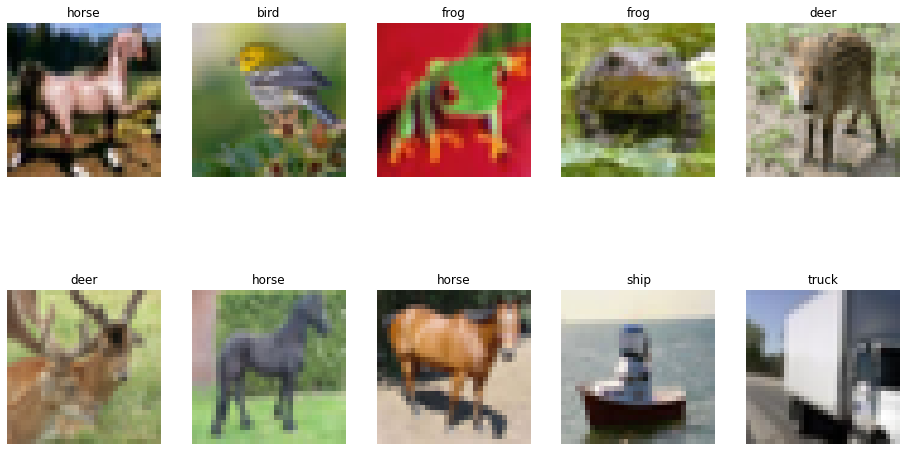

In [ ]:
image_show(x_train, y_train, 10)

In [ ]:
# Scale and flatten data
x_train_norm =x_train.reshape(50000, 32*32*3)/255
x_test_norm = x_test.reshape(10000, 32*32*3)/255

# Check 
print('X_train:\n ', x_train_norm)
print('X_test:\n ', x_test_norm)

X_train:
  [[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]
 [0.60392157 0.69411765 0.73333333 ... 0.56078431 0.52156863 0.56470588]
 [1.         1.         1.         ... 0.31372549 0.3372549  0.32941176]
 ...
 [0.1372549  0.69803922 0.92156863 ... 0.04705882 0.12156863 0.19607843]
 [0.74117647 0.82745098 0.94117647 ... 0.76470588 0.74509804 0.67058824]
 [0.89803922 0.89803922 0.9372549  ... 0.63921569 0.63921569 0.63137255]]
X_test:
  [[0.61960784 0.43921569 0.19215686 ... 0.08235294 0.2627451  0.43137255]
 [0.92156863 0.92156863 0.92156863 ... 0.72941176 0.78431373 0.78039216]
 [0.61960784 0.74509804 0.87058824 ... 0.02745098 0.03137255 0.02745098]
 ...
 [0.07843137 0.05882353 0.04705882 ... 0.09803922 0.07843137 0.18431373]
 [0.09803922 0.15686275 0.04705882 ... 0.36078431 0.47058824 0.31372549]
 [0.28627451 0.30588235 0.29411765 ... 0.10588235 0.10196078 0.10196078]]


In [ ]:
# Encode labels
lb = LabelBinarizer()
lb.fit([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(lb.classes_)
y_train_oh = lb.transform(y_train)
y_test_oh = lb.transform(y_test)
# I tried to give these encoded labels to Logistic regression model, but I got an error, thus I used the not encoded version of labels.

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
y_train_oh[:5]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
# Prepare LogisticRegression model
lr_model = LogisticRegression(multi_class='multinomial', solver='saga')

# Fit the data
lr_model.fit(x_train_norm, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(multi_class='multinomial', solver='saga')

If the ‘multi_class’ option is set to ‘multinomial’, then the cross-entropy loss is applied.

In [ ]:
# Predict labels for test set
y_pred = lr_model.predict_proba(x_test_norm)

In [ ]:
y_pred[0]

array([0.00627749, 0.02224219, 0.07336705, 0.44404789, 0.02319739,
       0.06466732, 0.23361969, 0.00183678, 0.12992309, 0.00082111])

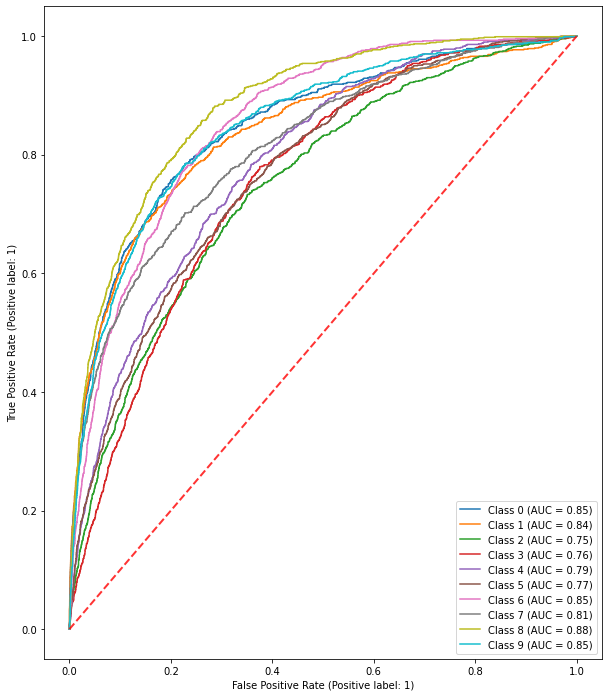

In [ ]:
# Plot ROC curves of all classes separately

# Create figure
fig, ax = plt.subplots(figsize=(10, 12))

for cls in np.unique(y_test):
  # Binarize the y_train based on the current label is in the current class (1) or not (0)
  y_test_bi = np.array([1 if sample_lb == cls else 0 for sample_lb in y_test])
  # Extract the current class predicted probabilities
  y_pred_prob = np.array([i[cls] for i in y_pred])
  RocCurveDisplay.from_predictions(y_test_bi, y_pred_prob, ax=ax, name='Class {}'.format(cls))
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=0.8)

In [ ]:
# Convert probability prediction into real prediction (highest probability of class is the real prediction)
y_pred_dec = np.array([i.argmax() for i in y_pred])

In [ ]:
# Calculate accuracy
accuracy_score(y_test,y_pred_dec)

0.4036

# 2. Train an SGDClassifier regression model on the dataset and predict all the test outcomes with the sklearn API.
- Select the appropiate loss for this task, explain what this means.
- Time is precious, run multiple jobs at the same time.
- Plot the ROC curves and AUC scores on the same figure for the test set.
- Calculate the accuracy of the classifier.
- Why is this worse than the previous model?
- Describe the above model with your own words, how is it different than the logistic regression model?

I selected **'modified huber'** as loss for this task, because this is the one probabilistic estimator besides logistic loss. I haven't chosen logistic loss, because it was already used in the previous task, therefore just modified huber remained. 

In [ ]:
# Build the model
sgd_clf_model = SGDClassifier(loss='modified_huber', n_jobs=8)

# Fit to the train set
sgd_clf_model.fit(x_train_norm, y_train.ravel())

SGDClassifier(loss='modified_huber', n_jobs=8)

In [ ]:
# Predict y test labels
y_pred_sgd = sgd_clf_model.predict_proba(x_test_norm)

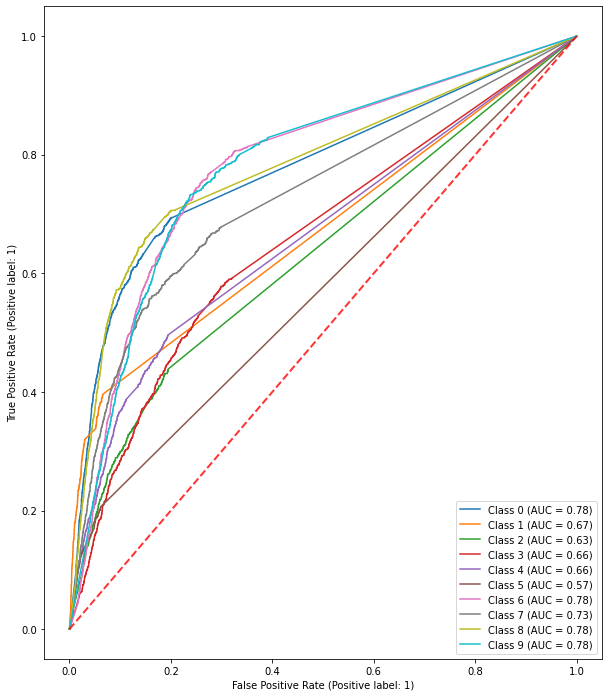

In [ ]:
# Plot ROC curves of all classes separately

# Create figure
fig, ax = plt.subplots(figsize=(10, 12))

for cls in np.unique(y_test):
  # Binarize the y_train based on the current label is in the current class (1) or not (0)
  y_test_bi = np.array([1 if sample_lb == cls else 0 for sample_lb in y_test])
  # Extract the current class predicted probabilities
  y_pred_prob = np.array([i[cls] for i in y_pred_sgd])
  RocCurveDisplay.from_predictions(y_test_bi, y_pred_prob, ax=ax, name='Class {}'.format(cls))
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=0.8)

In [ ]:
# Convert probability prediction into real prediction (highest probability of class is the real prediction)
y_pred_dec_sgd = np.array([i.argmax() for i in y_pred_sgd])

In [ ]:
# Calculate accuracy
accuracy_score(y_test,y_pred_dec_sgd)

0.3266

This (SGD classifier) is a linear model optimization method despite logistic regression in previous task (1. task) which is a machine learning linear model. The SGD classifier gave worse prediction, because it applies Stochastic Gradient descent that wasn't capable to predict this type of data well. 

# 3. Train a RandomForest classifier
- Plot the ROC curve with AUC scores on the test set.
- Calculate accuracy of the classifier on the test set.
- Time is precious, run multiple jobs at the same time.

In [ ]:
# Build model
rdf_clf = RandomForestClassifier(max_depth=10, n_jobs=12)

In [ ]:
# Fit model
rdf_clf.fit(x_train_norm, y_train.ravel())

RandomForestClassifier(max_depth=10, n_jobs=12)

In [ ]:
# Predict
y_pred_rdf = rdf_clf.predict_proba(x_test_norm)


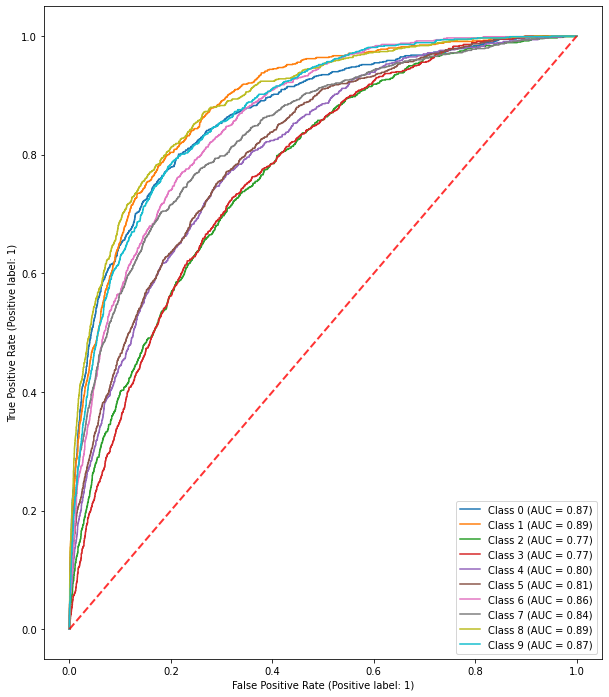

In [ ]:
# Plot ROC curves
# Create figure
fig, ax = plt.subplots(figsize=(10, 12))

for cls in np.unique(y_test):
  # Binarize the y_train based on the current label is in the current class (1) or not (0)
  y_test_bi = np.array([1 if sample_lb == cls else 0 for sample_lb in y_test])
  # Extract the current class predicted probabilities
  y_pred_prob = np.array([i[cls] for i in y_pred_rdf])
  RocCurveDisplay.from_predictions(y_test_bi, y_pred_prob, ax=ax, name='Class {}'.format(cls))
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=0.8)

In [ ]:
# Convert probability prediction into real prediction (highest probability of class is the real prediction)
y_pred_dec_rdf = np.array([i.argmax() for i in y_pred_rdf])

In [ ]:
# Calculate accuracy
accuracy_score(y_test,y_pred_dec_rdf)

0.4264

# 4. Train an multi layer perceptron classifier
- use the MLPClassifier from sklearn
- Set its parameter to max_iter = 30 or if you have time, set it for at least 100. After 30 iterations the model does not converge but gives reasonable predictions (with default parameters).
- Plot the ROC curves with AUC scores for the test set.
- Calculate the accuracy of the model on the test set.

In [ ]:
# Build the model
mlp_clf = MLPClassifier(max_iter=30)

In [ ]:
# Fit it
mlp_clf.fit(x_train_norm, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(max_iter=30)

In [ ]:
# Predict
y_pred_mlp = mlp_clf.predict_proba(x_test_norm)

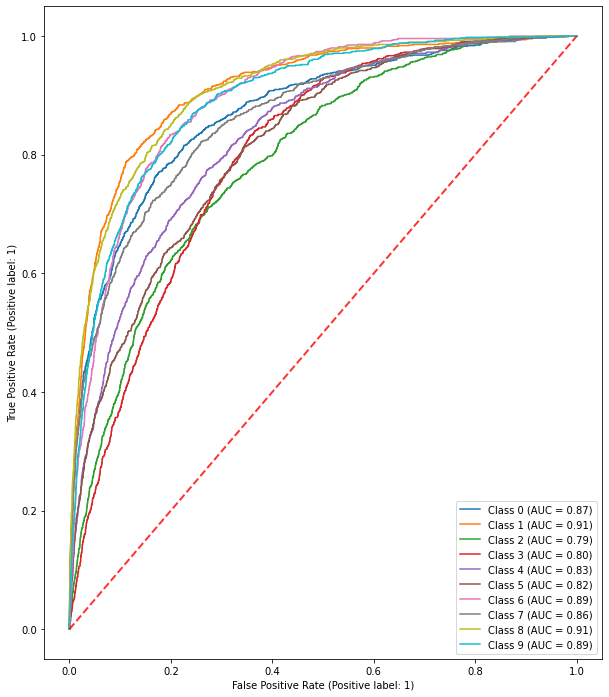

In [ ]:
# Plot ROC curves
# Create figure
fig, ax = plt.subplots(figsize=(10, 12))

for cls in np.unique(y_test):
  # Binarize the y_train based on the current label is in the current class (1) or not (0)
  y_test_bi = np.array([1 if sample_lb == cls else 0 for sample_lb in y_test])
  # Extract the current class predicted probabilities
  y_pred_prob = np.array([i[cls] for i in y_pred_mlp])
  RocCurveDisplay.from_predictions(y_test_bi, y_pred_prob, ax=ax, name='Class {}'.format(cls))
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=0.8)

In [ ]:
# Convert probability prediction into real prediction (highest probability of class is the real prediction)
y_pred_dec_mlp = np.array([i.argmax() for i in y_pred_mlp])

In [ ]:
# Calculate accuracy
accuracy_score(y_test,y_pred_dec_mlp)

0.4569

# 5. Train a ResNet50 CNN model on the dataset, utilize pre-trained weights and fine-tune for at least 3 epochs:
- training for 3 epochs should be enough to prove that this model is superior compared to others, train longer and you'll see exceptional results
- Convert the dataset:

  - train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
  - train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32)

  - test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
  - test_dataset = test_dataset.batch(32)
- Hints:

  - loading a pretrained model and letting its parameters be tunable
  backbone = tf.keras.applications.YOUR_MODEL_OF_CHOICE
  backbone.trainable = True # DO NOT FORGET TO UNFREEZE IT
  - defining your custom model with the pretrained backbone

In [ ]:
# One-hot encoding labels
y_train_oh = tf.keras.utils.to_categorical(y_train)
y_test_oh = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train_oh[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
# Convert dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_norm, y_train_oh))

train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test_norm, y_test_oh))

test_dataset = test_dataset.batch(32)

In [ ]:
def my_own_model():
  input_placeholder = tf.keras.layers.Input(shape=(32, 32, 3))
  # DO NOT FORGET THE PROPER INPUT PREPROCESSING FOR THE BACKBONE
  x = tf.keras.applications.resnet50.ResNet50(include_top=False, input_shape=(32, 32, 3), classes=y_train_oh.shape[1])
  # PLEASE USE THE PROPER INPUT: (e.g. 8 bit input)
  x = backbone(x)
  
  # Here comes some more layers
  # and flattening at the end if needed!
  out = # layer outputting the specified number of classes
        # with or without a softmax activation, later on
        # the choice of the loss depends on this
  model = tf.keras.models.Model(inputs=inp, outputs=out)
  return model

SyntaxError: ignored